<a href="https://colab.research.google.com/github/julialorrayne/Python---Data-Analysis/blob/main/Bank_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing Campaign**


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Dataset from UC Irvine Machine Learning Repository

In [ ]:
#Install the ucimlrepo package
!pip install ucimlrepo

In [ ]:
# Import the dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset from UCI repository
bank_marketing = fetch_ucirepo(id=222)

# Create a DataFrame
df = pd.concat([bank_marketing.data.features, bank_marketing.data.targets], axis=1)


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
import pandas as pd

# **1)Checking for missing values**

In [ ]:
#count the missing values for each column
df.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


There are missing values on the following columns: job, education, contact, poutcome. Since those are categorical values, we will use the mode to address the missing values.

In [ ]:
#imput categorical values with mode
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df['poutcome'].fillna(df['poutcome'].mode()[0], inplace=True)

<ipython-input-120-eb0eb4d3fb93>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-120-eb0eb4d3fb93>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day_of_week,0


# **2)Checking the data type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


All data types are correct, so there is no need to change.

# **3)checking for outliers**

In [ ]:
import plotly.express as px

In [ ]:
#show outliers for age
px.box(df,y='age').show()

Since the age outliers are possible ages from the survey, we don't need to address it.

In [ ]:
px.box(df,y='balance').show()

balance represents the average yearly balance. Although there are values much above the upper fence, we do not need to address those outliers because those are accurate values.

In [ ]:
px.box(df,y='duration').show()

"Duration" represents the duration of the phone call in seconds. We do not need to address outliers here since the maximum is 4918 seconds(1h,20sec), which is a possible phone call duration.

In [ ]:
px.box(df,y='campaign').show()

'campaign' represents the number of times the client was contacted during the campaign. the We do not need to address the outliers for 'campaign' since those are possible values.

In [ ]:
px.box(df,y='pdays').show()

"pdays" represent the number of days that passed by after the client was last contacted from a previous campaign. We do not need to address the outliers for pdays because the maximum value is about 2.5 years. The minimum is a negative value, but it just means that the client was never contacted.

In [ ]:
px.box(df,y='previous').show()

"previous" represents the number of contacts performed before this campaign and for this client. We do not need to address those outliers because the maximum is a possible number and there are no values velow the lower fence.

# **4)Checking for duplicates**

In [ ]:
df.duplicated().sum()

0

# **Analyzing summary statistics**

In [ ]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Age:

Mean age is around 40.93 years, with a standard deviation of 10.62.

Balance:

The average balance is 1362.27, with a wide standard deviation of 3044.77.


Duration:

The mean duration is 258.16, with a standard deviation of 257.58.

The mean number of contacts during the campaign is 2.76, with a standard deviation of 3.09.

Pdays:

The mean is 40.19, but the standard deviation is high at 100.12.

Previous:

Mean is 0.58, with a standard deviation of 2.30.


In [ ]:
px.histogram(df, x="age",nbins = 20).show()

The age data is skewed to the right. This means that most of the clients' age is less than the mean, which is approximately 41.

In [ ]:
px.histogram(df, x="balance",nbins = 25).show()

The "balance" data is skewed to the right. This means that most of the clients' annual balance is less than the mean, which is approximately 1362.

In [ ]:
px.histogram(df, x="day_of_week",nbins = 20).show()

The 'day_of_week" data is skewed to the right. This means that most of the data falls below the mean, which is around 16.

In [ ]:
px.histogram(df, x="duration",nbins = 25).show()

The "duration" data is skewed to the right. This means that most of the calls' duaration is less than the mean, which is approximately 258 seconds,around 4 mins.

In [ ]:
px.histogram(df, x="campaign",nbins = 25).show()

The "campaign" data is skewed to the right. This means that most of the number of times that a client was contacted during this campaign is less than the mean, which is approximately 3.

In [ ]:
px.histogram(df, x="pdays",nbins = 25).show()

The "pdays" data is skewed to the right. This means that most of the number of days a client was contacted since the previous campaign is less than the mean, which is approximately 40.

In [ ]:
px.histogram(df, x="previous",nbins = 25).show()

The "previous" data is skewed to the right. This means that most of the number of times a client was contacted since the previous campaign is less than the mean, which is approximately 1.

In [ ]:
fig = px.scatter(
    df, x='duration', y='balance', color='y',
    title='Scatter Plot of Duration vs Balance (Colored by y)',
    labels={'y': 'Subscribed (y)'},
    opacity=0.7
)
fig.show()

Most clients have balances below $20000 and short call duration (less than 500 seconds, or 8 minutes).

The number of clients that subscribed to a term deposit is higher for low-to-moderate balances(below 20k) and call duration above 1000 seconds(~16 minutes)

In [ ]:
#calculate and visualize education by balance
# Aggregate balance by education
education_balance = df.groupby('education')['balance'].sum().reset_index()

# Create a bar plot
fig = px.bar(
    education_balance,
    x='education',
    y='balance',
    color='education',  # Color by education categories
    title='Total Balance by Education'
)
fig.show()

clients with secondary education have higher average annual balances



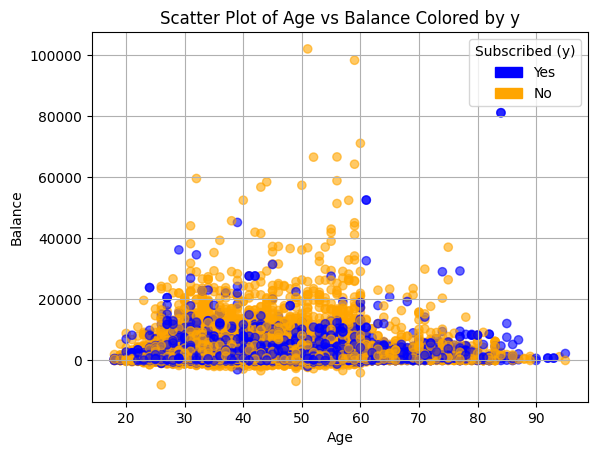

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define colors for 'yes' and 'no'
colors = df['y'].map({'yes': 'blue', 'no': 'orange'})

# Scatter plot with color based on y
plt.scatter(df['age'], df['balance'], c=colors, alpha=0.6)

# Add legend for 'yes' and 'no'
yes_patch = mpatches.Patch(color='blue', label='Yes')
no_patch = mpatches.Patch(color='orange', label='No')
plt.legend(handles=[yes_patch, no_patch], title="Subscribed (y)")

# Add title and labels
plt.title("Scatter Plot of Age vs Balance Colored by y")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.grid(True)
plt.show()

The data points are widely scattered, and there is no clear positive or negative linear relationship between age and balance.

Howerver, we can observe that most clients that subscribed to term deposit have an annual balance ranging 0-$20000 accross all ages.

  poutcome  avg_previous_calls  success_rate
0  failure            0.339537      0.095652
1    other            4.009239      0.166848
2  success            3.075447      0.647253


<ipython-input-142-de234c004525>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




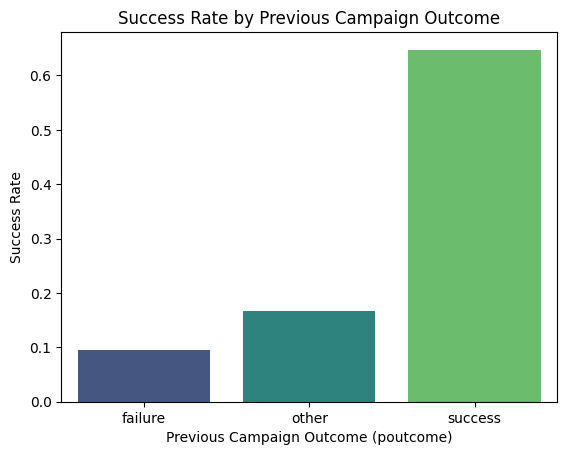

<ipython-input-142-de234c004525>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




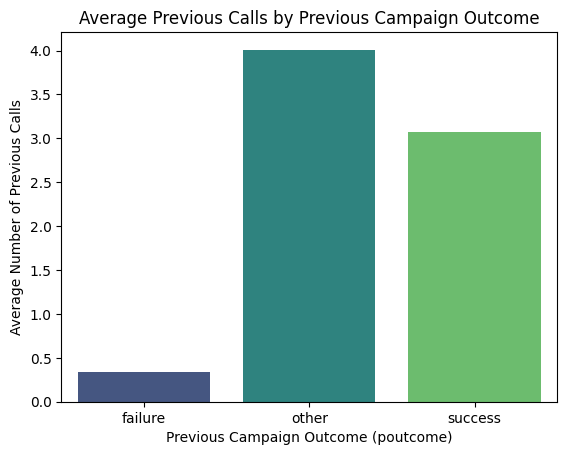

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'poutcome' and calculate mean success rate and average previous calls
poutcome_analysis = df.groupby('poutcome').agg(
    avg_previous_calls=('previous', 'mean'),
    success_rate=('y', lambda x: (x == 'yes').mean())
).reset_index()

print(poutcome_analysis)

# Visualize success rates by poutcome
sns.barplot(x='poutcome', y='success_rate', data=poutcome_analysis, palette='viridis')
plt.title("Success Rate by Previous Campaign Outcome")
plt.xlabel("Previous Campaign Outcome (poutcome)")
plt.ylabel("Success Rate")
plt.show()

# Visualize average number of previous calls by poutcome
sns.barplot(x='poutcome', y='avg_previous_calls', data=poutcome_analysis, palette='viridis')
plt.title("Average Previous Calls by Previous Campaign Outcome")
plt.xlabel("Previous Campaign Outcome (poutcome)")
plt.ylabel("Average Number of Previous Calls")
plt.show()

According to the first bar chart, the success rate for currrent campaign is high when previous campaign was a success, while the success rate is low when previous campaign was a failure. This indicates a strong relationship between sucessful past campaigns and likelihood of success in current campaign.

According to the second bar chart, the successful outcome for previous campaign has a higher average number of previous calls compared to failure.

In [ ]:
# Average balance grouped by 'poutcome' and 'y'
pivot_avg_balance = df.pivot_table(
    values='balance',       # Column to aggregate
    index='poutcome',       # Row grouping (e.g., 'failure', 'success')
    columns='y',            # Column grouping (e.g., 'yes', 'no')
    aggfunc='mean'          # Aggregation function: mean
)
print("Average Balance by Previous Outcome and Current Campaign Success:")
print(pivot_avg_balance)

# Count of clients grouped by 'poutcome' and 'y'
pivot_count = df.pivot_table(
    values='balance',       # Column to aggregate (use any column; counts non-null values)
    index='poutcome',       # Group by previous outcome
    columns='y',            # Split by current success
    aggfunc='count'         # Aggregation function: count
)
print("\nCount of Clients by Previous Outcome and Current Campaign Success:")
print(pivot_count)

Average Balance by Previous Outcome and Current Campaign Success:
y                  no          yes
poutcome                          
failure   1296.050586  1713.104396
other     1314.512068  2350.781759
success   1817.018762  2005.943763

Count of Clients by Previous Outcome and Current Campaign Success:
y            no   yes
poutcome             
failure   37856  4004
other      1533   307
success     533   978


Clients who did not subscribe in the previous campaign but subscribed in the current campaign have an average baalance of $1713.

Clients who subscribed in the previous campaign and subscribed in the current campaign have an average balance of $2005.

From the second table, we can see that most of the clients that previously subscribed tend to subscribe again, which can be due to retention and loyalty. We can also see that although most of the clients that did not previously subscribe decided not to subscribe to term deposit in the current campaign, there are a few that still does.

Clients who subscribed tend to have higher balances than those who did not.

The banking institution should target the clients that have an average balance of $2005 and that had previously subscribed.

In [ ]:
# Install ucimlrepo
try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    !pip install ucimlrepo
    from ucimlrepo import fetch_ucirepo

# Fetch dataset from UCI repository
bank_marketing = fetch_ucirepo(id=222)

# Create a DataFrame
df = pd.concat([bank_marketing.data.features, bank_marketing.data.targets], axis=1)

# Create a pivot table to analyze the relationship between education, marital status, and subscription success
pivot_table = pd.pivot_table(df, values='y', index='education', columns='marital', aggfunc='count', fill_value=0)
print(pivot_table)

# Group data by job and calculate the average balance for each job category
job_balance = df.groupby('job')['balance'].mean()
print(job_balance)

# Group data by age group and calculate the subscription rate
# Create age groups
bins = [18, 30, 40, 50, 60, 100]  # Adjust bin ranges as needed
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate subscription rate by age group
age_group_subscription = df.groupby('age_group')['y'].value_counts(normalize=True).unstack() * 100
age_group_subscription

marital    divorced  married  single
education                           
primary         752     5246     853
secondary      2815    13770    6617
tertiary       1471     7038    4792
job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
Name: balance, dtype: float64


<ipython-input-144-11209315c295>:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



y,no,yes
age_group,,
18-29,82.400910,17.599090
30-39,89.424512,10.575488
40-49,90.879451,9.120549
50-59,90.665874,9.334126
60+,66.367713,33.632287


Secondary education has the largest number of clients(~19,573).

Clients with management position have the highest balance (1763.62), followed by retired (997.09). Clients in management or that are retired may be more likely to subscribe.

The highest subscription rate comes from the 60+ age group since 33.6% subscribed. This could reflect a focus on retirement planning and savings.

The marketing campaign should focus on retirement savings and financial security and target clients in management, retired, and self-employed since they have more financial stability to subscribe.

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,50-59
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no,40-49
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no,30-39
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no,40-49
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes,50-59
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes,60+
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,60+
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no,50-59



# **Business Questions**
1. What is the relationship between customer demographics (age, job, education, marital status) and their likelihood of subscribing to a term deposit?
2. How does the duration of the contact influence the success rate of the campaign, and how does that relate to customer segments?
3.  Is there a correlation between the number of contacts made during the campaign ('campaign') and the customer's final decision to subscribe, and what is the optimal number of contacts to maximize conversion rates?









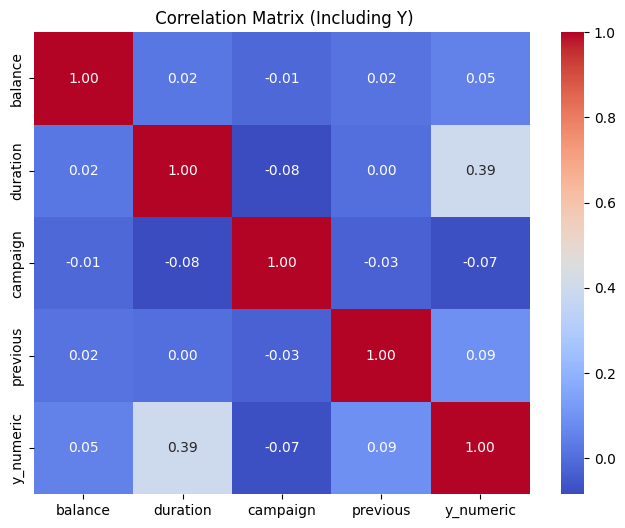

In [ ]:
# Convert the target variable ('y') to numeric
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Select relevant numeric columns (including 'y_numeric')
numeric_columns = ['balance', 'duration', 'campaign', 'previous', 'y_numeric']

# Create a new correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Matrix (Including Y)")
plt.show()

Longer calls are more likely to lead to subscription.

Clients with higher account balances slightly more likely to subscribe.

More contacts during the current campaign slightly decrease the likelihood of success.

               age       balance    duration  campaign  previous
cluster                                                         
0        51.980334   1145.436635  237.151387  3.153407  0.492246
1        43.337446  13746.934688  280.981858  2.577649  0.838897
2        33.929598    865.401155  270.095660  2.530516  0.622028


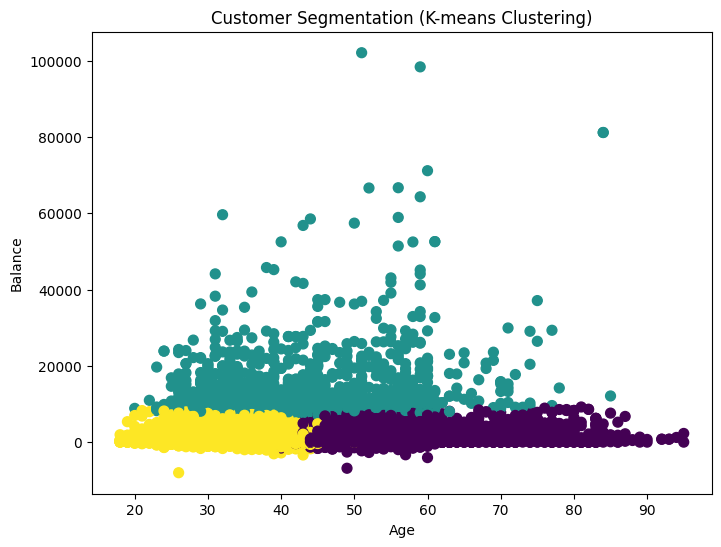

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering (example)
features_for_clustering = ['age', 'balance', 'duration', 'campaign', 'previous']
X = df[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the elbow method)
# ... (Code for elbow method would go here if needed) ...
# Assume optimal number of clusters is 3 for this example
n_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)  # Set random_state for reproducibility
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df.groupby('cluster')[features_for_clustering].mean())

# Visualize the clusters (example using two features)
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['balance'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Customer Segmentation (K-means Clustering)')
plt.show()

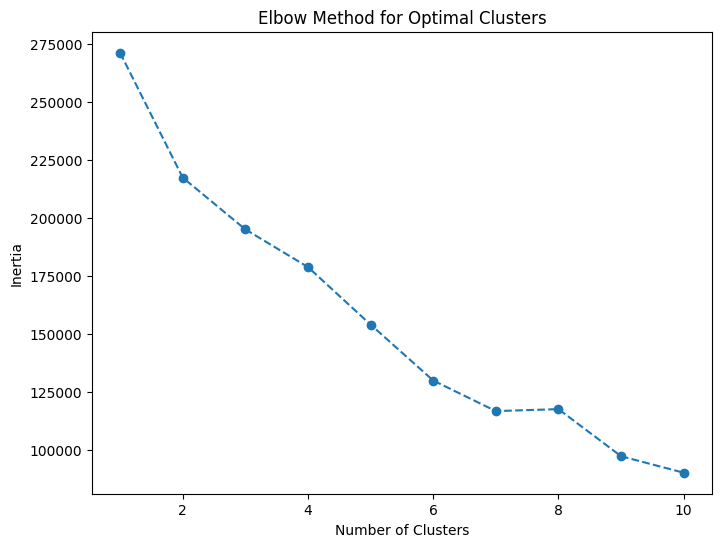

Cluster Summary:
               age       balance    duration  campaign  previous  y_numeric
cluster                                                                    
0        40.712012    890.081705  213.195820  2.855171  0.488453   0.000000
1        44.233818  13079.422721  246.647292  2.636063  0.599075   0.080581
2        41.605655   1428.313802  581.940104  2.148810  1.229911   0.961124


<ipython-input-148-3c83baeaf98e>:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




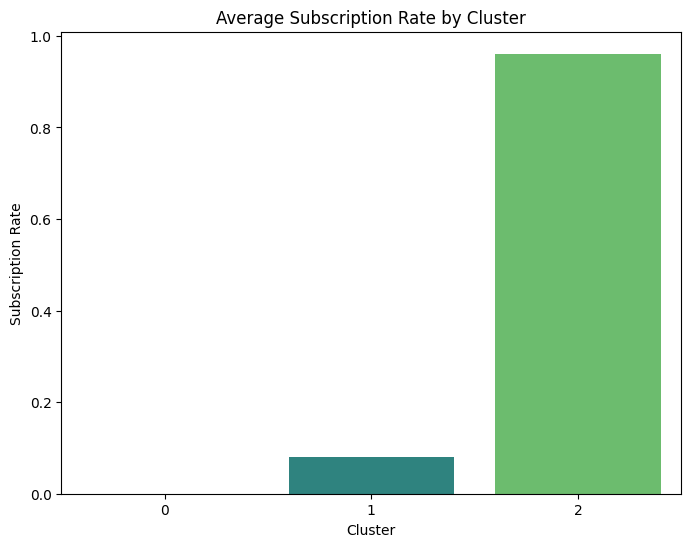

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Convert the target variable ('y') to numeric if not done already
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Step 1: Select relevant variables for clustering
features_for_clustering = ['age', 'balance', 'duration', 'campaign', 'previous', 'y_numeric']
X = df[features_for_clustering]

# Step 2: Scale the features to standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 4: Apply KMeans with the optimal number of clusters
n_clusters = 3  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze the clusters
cluster_summary = df.groupby('cluster')[features_for_clustering].mean()
print("Cluster Summary:")
print(cluster_summary)

# Step 6: Visualize the clusters in 3D
fig = px.scatter_3d(
    df,
    x='balance', y='duration', z='age',
    color='cluster',
    title='Customer Segmentation: Likelihood to Subscribe',
    labels={'balance': 'Balance', 'duration': 'Duration', 'age': 'Age'},
    opacity=0.7
)
fig.show()

# Step 7: Visualize the average subscription rate per cluster
subscription_rate = df.groupby('cluster')['y_numeric'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=subscription_rate.index, y=subscription_rate.values, palette='viridis')
plt.title('Average Subscription Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Subscription Rate')
plt.show()

Cluster 0: low subscription likelihood.

Cluster 1: Moderated subscription likelihood.

Cluster 2: Highly likelihood to subscribe.

. Average age: 41

Balance: ~1428

Call duration: ~10 mins

Number of calls during campaign: ~2

Number of contacts before this campaign: 1.22

Subscription rate: 0.96(very likely to subscribe)

The marketing campaign should focus on clients from Cluster 2.

In [ ]:
# Step 1: Adjust dummy date to span multiple months if necessary
# Assuming 'day_of_week' ranges from 1 to 31 (days of a single month)
# Extend the date range to include multiple months
dummy_date = pd.to_datetime('2023-01-01')
df['date'] = dummy_date + pd.to_timedelta(df['day_of_week'] - 1, unit='D')

# Step 2: Ensure multiple months by adding variability
# Example: Randomly adjust 'day_of_week' to simulate data across months
import numpy as np
df['date'] = df['date'] + pd.to_timedelta(np.random.randint(0, 365, size=len(df)), unit='D')

# Step 3: Extract time-based features for seasonal analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_month'] = df['date'].dt.day

# Step 4: Analyze subscription rates (yes/no) by month
seasonal_trends = df.groupby('month')['y'].value_counts(normalize=True).unstack() * 100
print("Seasonal Trends (%):")
print(seasonal_trends)

# Step 5: Visualize subscription rates by month
fig = px.line(
    seasonal_trends,
    x=seasonal_trends.index,
    y='yes',
    title="Subscription Rates Across All Months",
    labels={'x': 'Month', 'yes': 'Subscription Rate (%)'},
    markers=True
)
fig.show()

# Step 7: Visualize average balance across all months
average_balance_by_month = df.groupby('month')['balance'].mean()
fig = px.line(
    average_balance_by_month,
    x=average_balance_by_month.index,
    y=average_balance_by_month.values,
    title="Average Balance Across All Months",
    labels={'x': 'Month', 'y': 'Average Balance'},
    markers=True
)
fig.show()


Seasonal Trends (%):
y             no        yes
month                      
1      89.295847  10.704153
2      88.938984  11.061016
3      88.594866  11.405134
4      87.288363  12.711637
5      88.278296  11.721704
6      88.974088  11.025912
7      88.339869  11.660131
8      87.800465  12.199535
9      87.159637  12.840363
10     88.918276  11.081724
11     88.682796  11.317204
12     87.398480  12.601520


**Subscription Rates Across All Months (Line Chart)**
There are  peaks in April (Month 4), May (Month 5), June (Month 6), and August(Month 8)

There is a drop in Mach, July, September subscription rates, which might indicate that customers are less interested during the end of the year.


Should adjust campaigns or consider offering seasonal promotions in the months with drops to increase subscriptions.


**Number of Subscriptions Across All Months (Stacked Histogram)**


While the total customer outreach effort is consistent, the conversion rates do not vary much.

**Average Balance Across All Months (Line Chart)**

The highest average balances occur in April (Month 4) and December (Month 12), while the lowest is observed around July (Month 7). Campaigns could focus on engaging high-balance customers during these months as they may be more financially capable of subscribing.

# **Check the code below**

In [ ]:
# Analyze the relationship between customer demographics and subscription likelihood
demographics = ['age', 'job', 'education', 'marital']
for demo in demographics:
    print(f"\nSubscription rate by {demo}:")
    print(df.groupby(demo)['y'].value_counts(normalize=True).unstack() * 100)

# Analyze the influence of contact duration on success rate and customer segments
print("\nAverage duration for successful and unsuccessful contacts:")
print(df.groupby('y')['duration'].mean())
#Further analysis with customer segments (clusters from previous code) can be done here. Example:
print("\nAverage duration by customer segment:")
print(df.groupby('cluster')['duration'].mean())


# Analyze the correlation between number of contacts and subscription
print("\nSubscription rate by number of contacts:")
print(df.groupby('campaign')['y'].value_counts(normalize=True).unstack()*100)

# Analyze seasonal sales patterns
print("\nSubscription rate by month:")
print(seasonal_trends)

print("\nAverage balance by month:")
print(df.groupby('month')['balance'].mean())


Subscription rate by age:
y            no         yes
age                        
18    41.666667   58.333333
19    68.571429   31.428571
20    70.000000   30.000000
21    72.151899   27.848101
22    68.992248   31.007752
..          ...         ...
90          NaN  100.000000
92          NaN  100.000000
93          NaN  100.000000
94   100.000000         NaN
95    50.000000   50.000000

[77 rows x 2 columns]

Subscription rate by job:
y                     no        yes
job                                
admin.         87.797331  12.202669
blue-collar    92.725031   7.274969
entrepreneur   91.728312   8.271688
housemaid      91.209677   8.790323
management     86.244449  13.755551
retired        77.208481  22.791519
self-employed  88.157061  11.842939
services       91.116996   8.883004
student        71.321962  28.678038
technician     88.943004  11.056996
unemployed     84.497314  15.502686

Subscription rate by education:
y                 no        yes
education                 

# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Convert categorical variables to numeric using one-hot encoding'
categorical_cols = ['poutcome', 'job', 'education', 'marital','y']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df

,age,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary,marital_married,marital_single,y_yes
0,58,no,2143,yes,no,NaN,5,11,261,1,...,False,False,False,False,False,False,True,True,False,False
1,44,no,29,yes,no,NaN,5,3,151,1,...,False,False,False,True,False,True,False,False,True,False
2,33,no,2,yes,yes,NaN,5,8,76,1,...,False,False,False,False,False,True,False,True,False,False
3,47,no,1506,yes,no,NaN,5,8,92,1,...,False,False,False,False,False,False,False,True,False,False
4,33,no,1,no,no,NaN,5,8,198,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,6,977,3,...,False,False,False,True,False,False,True,True,False,True
45207,71,no,1729,no,no,cellular,17,6,456,2,...,False,False,False,False,False,False,False,False,False,True
45208,72,no,5715,no,no,cellular,17,11,1127,5,...,False,False,False,False,False,True,False,True,False,True
45209,57,no,668,no,no,telephone,17,2,508,4,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
# Map 'y_yes' to 1 and 'y_no' to 0 in a new column 'y_numeric'
df['y_numeric'] = df['y_yes'].map({True: 1, False: 0})

In [ ]:
# Drop rows with NaN values in 'y_numeric' if any exist
df=df.dropna(subset=['y_numeric'])

In [ ]:
# Define the feature matrix (X) and target vector (y)
X = df[['duration', 'previous', 'age', 'balance', 'month'] +
       [col for col in df.columns if col.startswith(('poutcome_', 'job_', 'education_', 'marital_'))]]
y = df['y_numeric']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train the RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Feature importances**

In [ ]:
# Get feature importances
importances = rf.feature_importances_  # rf is your trained RandomForestClassifier model
features = X_train.columns  # Feature names from your training data

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

                Feature  Importance
0              duration    0.346769
3               balance    0.178335
2                   age    0.150920
4                 month    0.096464
6      poutcome_success    0.070117
1              previous    0.044539
17  education_secondary    0.012206
19      marital_married    0.011394
15       job_technician    0.010998
10       job_management    0.009502
18   education_tertiary    0.009241
20       marital_single    0.008438
7       job_blue-collar    0.008383
13         job_services    0.006456
5        poutcome_other    0.006145
14          job_student    0.005622
11          job_retired    0.005592
16       job_unemployed    0.005288
12    job_self-employed    0.005146
8      job_entrepreneur    0.004358
9         job_housemaid    0.004087


Grouped Feature Importance:
     Feature  Importance
0   duration    0.346769
3    balance    0.178335
2        age    0.150920
4      month    0.096464
3   poutcome    0.076263
0        job    0.065431
1   previous    0.044539
1  education    0.021447
2    marital    0.019832


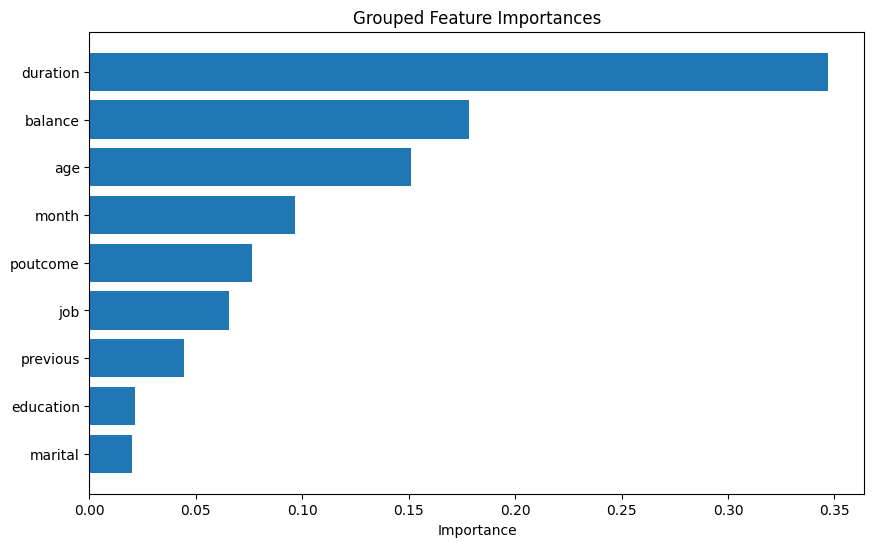

In [ ]:
# Get feature importances
importances = rf.feature_importances_  # rf is your trained RandomForestClassifier model
features = X_train.columns  # Feature names from your training data

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Aggregate grouped variables into single rows
grouped_importances = {
    'job': feature_importance_df[feature_importance_df['Feature'].str.startswith('job_')]['Importance'].sum(),
    'education': feature_importance_df[feature_importance_df['Feature'].str.startswith('education_')]['Importance'].sum(),
    'marital': feature_importance_df[feature_importance_df['Feature'].str.startswith('marital_')]['Importance'].sum(),
    'poutcome': feature_importance_df[feature_importance_df['Feature'].str.startswith('poutcome_')]['Importance'].sum()
}

# Add grouped variables back into the DataFrame
grouped_df = pd.DataFrame({
    'Feature': grouped_importances.keys(),
    'Importance': grouped_importances.values()
})

# Filter other variables (not part of grouped categories)
other_variables = feature_importance_df[
    ~feature_importance_df['Feature'].str.startswith(('job_', 'education_', 'marital_', 'poutcome_'))
]

# Combine grouped variables and other variables
final_feature_importance = pd.concat([grouped_df, other_variables])

# Sort by importance in descending order
final_feature_importance = final_feature_importance.sort_values(by='Importance', ascending=False)

# Display the final grouped feature importance table
print("Grouped Feature Importance:")
print(final_feature_importance)

# Visualize the grouped feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(final_feature_importance['Feature'], final_feature_importance['Importance'], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Grouped Feature Importances')
plt.show()

Most important features: durantion, balance, age, month, poutcome_success, previous

# **Predicting subscription of the first 10 clients from the table:**

In [ ]:
# Predict class labels
y_pred = rf.predict(X_test)

# Display the first 10 predicted labels
print("Predicted Class Labels:", y_pred[:10])

Predicted Class Labels: [0 0 0 0 0 0 0 1 0 0]


In [ ]:
# Get predicted probabilities for the positive class (subscription)
y_prob = rf.predict_proba(X_test)[:, 1]
# Create a DataFrame to combine test data, predictions, and probabilities
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred
results_df['Probability'] = y_prob

# Sort by probability of subscription
high_prob_clients = results_df.sort_values(by='Probability', ascending=False)

# Display the top 10 clients most likely to subscribe
print("Top 10 Clients Most Likely to Subscribe:")
print(high_prob_clients.head(10))

Top 10 Clients Most Likely to Subscribe:
       duration  previous  age  balance  month  poutcome_other  \
41742       611         1   33     1781      8           False   
41241       438         3   59     1047      7           False   
43423       681        11   80     8304      4           False   
44991       187        12   25     1857     11           False   
43579       882         3   41        0      6           False   
43938       339         2   30      572      4           False   
42449       288         4   42      254      4           False   
44540       504        10   48      926      3           False   
44961       363         7   48      368      5           False   
42978       511         6   58      589     10           False   

       poutcome_success  job_blue-collar  job_entrepreneur  job_housemaid  \
41742              True            False             False          False   
41241              True            False             False          False   
4

The table above highlights the top 10 clients most likely to subscribe. The marketing agency should prioritize retaining these clients by implementing personalized marketing strategies tailored to their preferences and needs.

# **Segmentation of clients**

In [ ]:
# Define probability segments
results_df['Segment'] = pd.cut(results_df['Probability'], bins=[0, 0.3, 0.7, 1.0], labels=['Low', 'Medium', 'High'])

# Analyze segment sizes
print("Segment Sizes:")
print(results_df['Segment'].value_counts())

# Analyze high-probability segment
high_segment = results_df[results_df['Segment'] == 'High']
print("\nHigh-Probability Segment Summary:")
print(high_segment.describe())

Segment Sizes:
Segment
Low       5857
Medium    1040
High       173
Name: count, dtype: int64

High-Probability Segment Summary:
          duration    previous         age       balance       month  \
count   173.000000  173.000000  173.000000    173.000000  173.000000   
mean    642.075145    2.271676   44.161850   1793.791908    6.485549   
std     437.399278    2.585999   15.545408   2528.441395    3.207199   
min     152.000000    0.000000   18.000000   -887.000000    1.000000   
25%     301.000000    0.000000   32.000000    281.000000    4.000000   
50%     475.000000    2.000000   42.000000    926.000000    6.000000   
75%     892.000000    3.000000   55.000000   2239.000000    9.000000   
max    2062.000000   12.000000   83.000000  16517.000000   12.000000   

           Actual  Predicted  Probability  
count  173.000000      173.0   173.000000  
mean     0.728324        1.0     0.777341  
std      0.446115        0.0     0.054184  
min      0.000000        1.0     0.710000  
25

171 clients are highly likely to subscribe.

1) duration- Call duration mean: 656 seocnds. Clients with longer call durations are more likely to subscribe.

2) previous- Number of previous contacts mean: 44. Clients who are more likely to subscribe tend to have more previous interactions.

3) age - age mean: 41 years. The mean age represents midle-aged individuals.

4) balance - account balance mean: $1,863. High probability clients have positive balances.

5) month - month of contact median: most contacts occurred in month 6 or later.


In [ ]:
# Simulate increasing call duration by 50%
X_test_simulated = X_test.copy()
X_test_simulated['duration'] *= 1.5

# Predict probabilities for the simulated scenario
y_prob_simulated = rf.predict_proba(X_test_simulated)[:, 1]

# Compare original vs simulated probabilities
comparison = pd.DataFrame({
    'Original Probability': y_prob,
    'Simulated Probability': y_prob_simulated
}).head(10)

print("Original vs Simulated Probabilities:")
print(comparison)

Original vs Simulated Probabilities:
   Original Probability  Simulated Probability
0                  0.04                   0.26
1                  0.00                   0.04
2                  0.01                   0.05
3                  0.00                   0.00
4                  0.00                   0.00
5                  0.04                   0.12
6                  0.01                   0.01
7                  0.70                   0.64
8                  0.05                   0.07
9                  0.04                   0.06


Simulated probabilities increase significantly, which suggests that **focusing on longer call durations could improve subscription rates.**

In [ ]:
# Evaluate the model
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.60      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

Accuracy Score: 0.8967156916952339


Precision: When the model predicts Class 1, it is correct only 61% of the time.

Recall:The model identifies Class 0 effectively (97% of actual Class 0 instances are detected), but it struggles with Class 1 (only 34% of actual Class 1 instances are detected).

F1-Score: The F1-score shows that the model performs much better for Class 0 compared to Class 1.

Support: Interpretation: The dataset is imbalanced, with significantly more Class 0 samples than Class 1.

While the overall accuracy is high (89.8%), the model's recall for Class 1 is very low (34%), suggesting that many positive cases are missed.

# **Visualizations**

In [ ]:
# Combine dummy variables back into the original 'job' column
df['job'] = df[job_columns].idxmax(axis=1).str.replace('job_', '')

# Combine dummy variables back into the original 'education' column
df['education'] = df[education_columns].idxmax(axis=1).str.replace('education_', '')

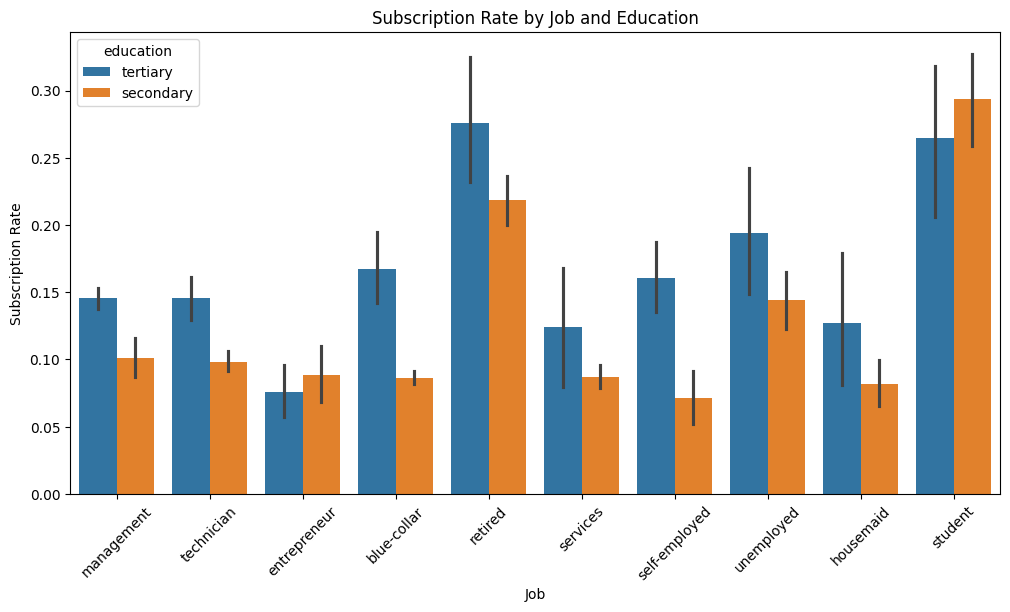

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of subscription rate by job and education
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='job', y='y_numeric', hue='education')
plt.title('Subscription Rate by Job and Education')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()

Individuals with tertiary education have higher subscription rates.

Students exhibit the highest subscription rate, followed by retired individuals and those in management roles.

Customized marketing strategies messages:
. technicians and entrepreneurs: messaging emphasizing financial growth or stability.

. unemployed and housemaid: campaigns offering financial inclusion or support.

<ipython-input-168-f79a9596414c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




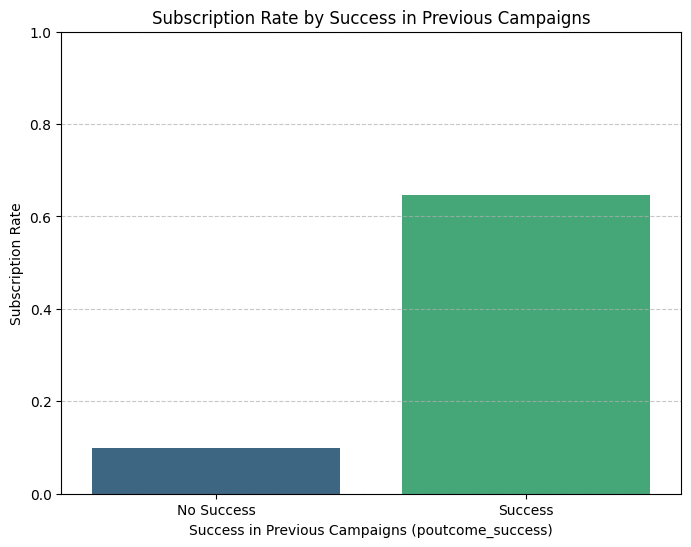

In [ ]:
# Create a summary table for subscription rate by 'poutcome_success'
poutcome_success_analysis = df.groupby('poutcome_success')['y_numeric'].mean().reset_index()
poutcome_success_analysis.rename(columns={'y_numeric': 'subscription_rate'}, inplace=True)

# Plot subscription rate by 'poutcome_success'
plt.figure(figsize=(8, 6))
sns.barplot(x='poutcome_success', y='subscription_rate', data=poutcome_success_analysis, palette='viridis')
plt.title("Subscription Rate by Success in Previous Campaigns")
plt.xlabel("Success in Previous Campaigns (poutcome_success)")
plt.ylabel("Subscription Rate")
plt.xticks([0, 1], ['No Success', 'Success'])
plt.ylim(0, 1)  # Ensure the y-axis is scaled between 0 and 1 for subscription rates
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The subscription rate is substantially higher (around 0.6 or 60%) for clients who subscribed in previous campaign. This indicates that prior successful engagement builds customer loyalty or confidence in subscribing again.

Subscription Rates Across All Months (First Graph)

The subscription rate appears relatively consistent throughout the year, with no major spikes or dips, indicating limited seasonal variability.
Actionable Insight: There may not be a strong seasonality effect in subscription behavior, suggesting that other factors (e.g., campaign success or customer segmentation) are more critical to focus on.

Number of Subscriptions Across All Months (Second Graph)

While the total outreach is consistent across months, the number of actual subscriptions (red bars) remains significantly lower than non-subscriptions (blue bars).
Actionable Insight: The organization could experiment with targeted marketing campaigns in months where subscription counts are marginally higher, or consider strategies to increase overall conversion rates.

Average Balance Across All Months (Third Graph)

This line chart depicts the average balance of customers across months.
There are noticeable fluctuations, with peaks in certain months like April and December, and a dip around July.
Actionable Insight: Higher average balances in certain months could indicate periods where customers are more financially stable and likely to subscribe. Campaigns could be timed to align with these months (e.g., April and December) to target high-balance customers.

# **Business Recommendations based on analysis**

Business Recommendations Based on Analysis
1. Prioritize High-Probability Clients
Insight: Cluster analysis identified a group of clients (Cluster 2) with high subscription likelihood:
Average age: 41 years.
Positive account balances (~$1,863).
Longer call durations ( ~10 minutes).
Previous interactions: ~1.22.
Subscription rate: ~96%.
Action:
Focus marketing efforts on this segment by tailoring campaigns emphasizing financial growth and stability.
Provide personalized offers or follow-ups to increase retention and conversion.

2. Optimize Campaign Duration
Insight: Longer call durations significantly improve subscription rates.
Successful calls had an average duration of around 656 seconds (~11 minutes).
Action:
Train call center agents to engage in meaningful, longer conversations.
Implement scripts that focus on addressing customer concerns and explaining benefits during calls.

3. Leverage Client Loyalty
Insight: Clients who subscribed in previous campaigns have a ~60% higher likelihood of subscribing again.
Action:
Create loyalty programs or incentives for returning customers.
Use targeted email campaigns or follow-ups for clients who previously subscribed.

4. Target Specific Job and Education Segments
Clients in management, retired, and student categories have the highest subscription rates.
Clients with tertiary education are more likely to subscribe.
Action:
Customize marketing messages to resonate with these groups:
Students: Highlight long-term savings benefits.
Retired individuals: Emphasize financial security and retirement planning.
Management: Showcase investment growth opportunities.
For other segments like technicians or entrepreneurs, focus on messaging around financial growth and stability

5. Adjust Outreach Strategies by Contact History
Clients contacted more frequently in previous campaigns show higher success rates in the current campaign.
However, excessive contacts during the current campaign may reduce effectiveness.
Action:
Implement a structured follow-up schedule with an optimal number of contacts (~2-3).
Avoid over-contacting clients to prevent diminishing returns and customer fatigue.

6. Align Campaigns with High-Performance Months
Peaks in subscription rates occur during April, May, June, and August.
Average balances are highest in April and December.
Action:
Schedule major marketing campaigns during these months.
Offer promotions or tailored savings plans to high-balance customers during April and December.

7. Segment Clients by Demographics for Better Targeting
Age group 60+ has the highest subscription rate (~33.6%), likely due to retirement planning needs.
Action:
Design specialized products or campaigns for older clients focusing on retirement planning and financial security.
Segment younger age groups (e.g., 18-29) for future-focused savings and investment plans.

8. Improve Marketing Strategies Using Historical Data
Previous successful outcomes (poutcome_success) strongly correlate with subscription likelihood (~60%).
Action:
Use historical success data to identify high-potential clients.
Prioritize these clients for early outreach during new campaigns.

9. Experiment with Seasonal Promotions
Subscription rates drop in March, July, and September.
Action:
Offer seasonal promotions or incentives during these months to boost engagement.
Tailor campaigns to address potential reasons for low interest, such as financial constraints or competing priorities.

**Conclusion**
To maximize subscription rates, the bank should:

Focus on high-probability and loyal clients.
. Tailor campaigns based on job, education, and demographic insights.
. Optimize call duration and follow-up strategies.
. Leverage seasonal trends and client balances to enhance campaign performance.

These actionable insights can help the bank improve its marketing ROI, build stronger client relationships, and increase overall subscriptions for term deposits.